In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from scipy.interpolate import lagrange

In [38]:
# f(x) used to generate dataset
def f(x):
    return x**50 + 49*x**35 + np.exp(x*x) - np.sin(x)

In [39]:
# TODO: complete this function to compute Root Mean Squared Error
def RMSE(y_actual, y_predicted):
    squaredDifference = (y_actual - y_predicted) ** 2   #squared differences between actual and predicted values
    meanSquaredDifference = np.mean(squaredDifference)  #mean of squared differences
    rmse = np.sqrt(meanSquaredDifference)
    return rmse

# Direct Method

## Direct Method: Compute Coefficients

In [40]:
# TODO: implement Direct (Matrix) method for polynomial interpolation
# this function should only compute the coefficients and return them in right order
def poly_coeffs_direct(x, y):
    matrix = np.vander(x, increasing = False) #Vandermonde Matrix Generated
    coeffs = np.linalg.solve(matrix, y)       #Linear system solved
    return coeffs

## Direct Method: Evaluate Polynomial

In [41]:
# TODO: this functions performs evaluation of polynomial using coefficients computed from direct method
# xx is the list of input numbers
# yy is the list of interpolated values computed
def poly_evaluation_direct(xx, coeffs):
    n = len(coeffs) - 1                                     #degree 
    yy = np.zeros_like(xx)                                  #Array initialised
    
    for j, x in enumerate(xx):                              #iterated through each point in xx. Enumerate() stores index too
       for k in range(n + 1):
           yy[j] += coeffs[k] * (x ** (n - k))              #polynomial values evaluated

    return yy

## Direct Method: Testing

RMSE: 0.030072693718308233


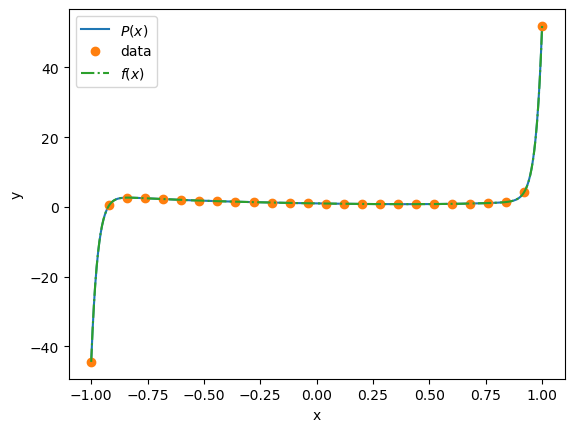

In [42]:
z = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 26)

y = f(x)

a = poly_coeffs_direct(x, y)

# yz are the values of the interpolating polynomial at z
yz = poly_evaluation_direct(z, a)

print('RMSE:', RMSE(f(z), yz) )

plt.plot(z,yz,'-')
plt.plot(x,y,'o')
plt.plot(z,f(z),'-.')
plt.legend(["$P(x)$","data","$f(x)$"])
plt.xlabel('x'); plt.ylabel('y'); plt.show()

In [43]:
# TODO: Generate the plot for a polynomial of order 25.

## Newton Method: Compute Coefficients

In [44]:
# TODO: implement Newton Divided Difference method for polynomial interpolation
# this function should only compute the coefficients and return them in right order
def poly_coeffs_newton(x, y):
    n = len(x)                                #no. of data points
    coeffs = y.copy()                         #copy of array
    for k in range(1,n):                      #divided differences calculated
        coeffs[k:n] = (coeffs[k:n] - coeffs[k-1])/(x[k:n] - x[k-1])
    return coeffs

## Newton Method: Evaluate Polynomial

In [45]:
# TODO: this functions performs evaluation of polynomial using coefficients computed from direct method
# z is the list of input numbers
# y is the list of interpolated values computed which will be returned
def poly_evaluation_newton(a, x, z):
    n = len(x)-1                    #degree of polynomial
    y = a[n]                        #gives highest degree
    for k in range(1,n+1):
        y = a[n-k] + (z - x[n-k])*y  #Newtons interpolation formula used
     
    return y

## Newton Method: Testing

RMSE: 0.0300727647648828


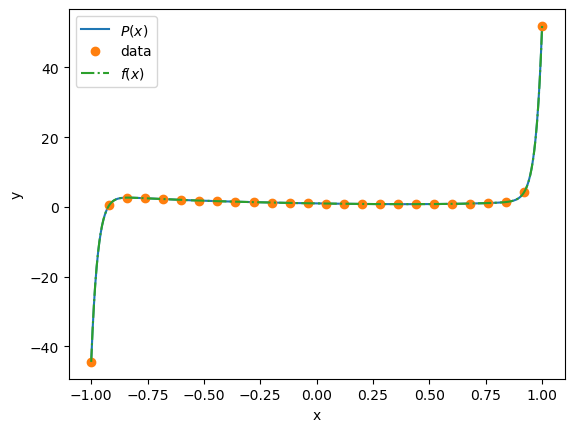

In [46]:
z = np.linspace(-1, 1, 1000)
x = np.linspace(-1, 1, 26)

y = f(x)

a = poly_coeffs_newton(x, y)

yz = poly_evaluation_newton(a, x, z)

print('RMSE:', RMSE(f(z), yz) )

plt.plot(z,yz,'-')
plt.plot(x,y,'o')
plt.plot(z,f(z),'-.')
plt.legend(["$P(x)$","data","$f(x)$"])
plt.xlabel('x'); plt.ylabel('y')
plt.show()